# PCA-based silhouette recognition

<p>This notebook shows how we can recognize objects based on the principal componentes of their silhouette</p>

<small>Author: Fernando Carlos López Hernández</small>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

This function computes the centroid, eigenvectors and eigenvalues of a silhouette in an image. The silhouette of the object is represented with white pixels. It returns a tuple with the centroid, eigenvectors and eigenvalues

In [2]:
def centroidAndEigens(im):
    # Get the white pixel coordinates
    indices = np.where(im > 0.5)
    pixel_coordinates = np.vstack([indices[1], indices[0]])
    # Calculate the centroid of the white pixels
    centroid = np.mean(pixel_coordinates, axis = 1)
    # Find the eigenvalues and principal axes (eigenvectors)
    e, E = np.linalg.eig(np.cov(pixel_coordinates))
    # Sort by eigenvalue
    idx = e.argsort()[::-1]   
    e = e[idx]
    E = E[:,idx]
    return centroid, E, e

This function shows the centroid the eigenvectors, and their eigenvalues. The thicker axis corresponds to the PC1

In [3]:
def plotCentroidEigenvectors(centroid, E, e, im, ax):
    """ Plot the centroid and the eigenvectors, and shows their eigenvalues
        The thicker axis corresponds to the PC1 """
    ax.set_axis_off()
    ax.imshow(im, cmap = 'gray')
    # Plot the centroid
    ax.scatter(x=[centroid[0]], y=[centroid[1]], c='r', s=40)
    # Plot the PCA axes
    m1 = E[1,0] / E[0,0]
    b1 = centroid[1] - m1*centroid[0]
    height,width = im.shape
    x = np.array([width*0.05, width*0.95])
    y1 = m1*x + b1
    ax.plot(x, y1, color = 'r', linewidth = 4)
    m2 = E[1,1] / E[0,1]
    b2 = centroid[1] - m2*centroid[0]
    y2 = m2*x + b2
    ax.plot(x, y2, color = 'r', linewidth = 2)
    ax.set_title('e = ' + str(np.round(e,2)), fontsize = 10)
    # Clip the lines
    ax.set_clip_on(True)
    ax.set_ylim(height, 0)
    ax.set_xlim(0,width)

Now we demostrate how to obtain the PCA-based features of the silhouettes of some objects

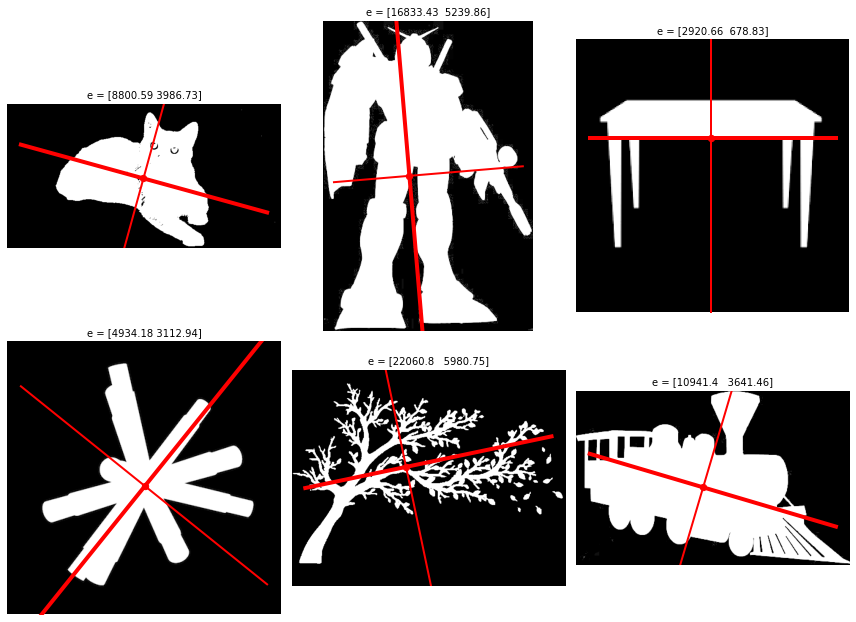

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = [12,9])
im = skimage.img_as_float(skimage.io.imread('silhouettes/cat.png', as_gray=True))
centroid, E, e = centroidAndEigens(im)
plotCentroidEigenvectors(centroid, E, e, im, axes[0,0])
im = skimage.img_as_float(skimage.io.imread('silhouettes/robot.png', as_gray=True))
centroid, E, e = centroidAndEigens(im)
plotCentroidEigenvectors(centroid, E, e, im, axes[0,1])
im = skimage.img_as_float(skimage.io.imread('silhouettes/table.png', as_gray=True))
centroid, E, e = centroidAndEigens(im)
plotCentroidEigenvectors(centroid, E, e, im, axes[0,2])
im = skimage.img_as_float(skimage.io.imread('silhouettes/tubes.png', as_gray=True))
centroid, E, e = centroidAndEigens(im)
plotCentroidEigenvectors(centroid, E, e, im, axes[1,0])
im = skimage.img_as_float(skimage.io.imread('silhouettes/tree.png', as_gray=True))
centroid, E, e = centroidAndEigens(im)
plotCentroidEigenvectors(centroid, E, e, im, axes[1,1])
im = skimage.img_as_float(skimage.io.imread('silhouettes/train.png', as_gray=True))
centroid, E, e = centroidAndEigens(im)
plotCentroidEigenvectors(centroid, E, e, im, axes[1,2])
plt.tight_layout()